In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import multiprocessing as mp
import sim_history_gaussian_noise
import time
import seaborn as sns
%matplotlib inline

In [2]:
def parallelize(game, args):
    tic = time.perf_counter()
    pool = mp.Pool(mp.cpu_count()-4)
    future_res = [pool.apply_async(game, args= args) for _ in range(10)]
    res = np.array([f.get() for f in future_res])
    mean_capital_list = np.mean(res, axis=0)
    toc = time.perf_counter()
    print(toc-tic)
    return mean_capital_list

In [3]:
x_axis = np.arange(0,101)

In [4]:
sigma_list = np.linspace(0.001, 0.1, 5)
scale_list = np.linspace(0.001, 0.05, 5)
mu = 0

# Game A

0.6828918999999587
0.6244297999992341
0.5648598999996466
0.5574224000001777
0.6022321999998894


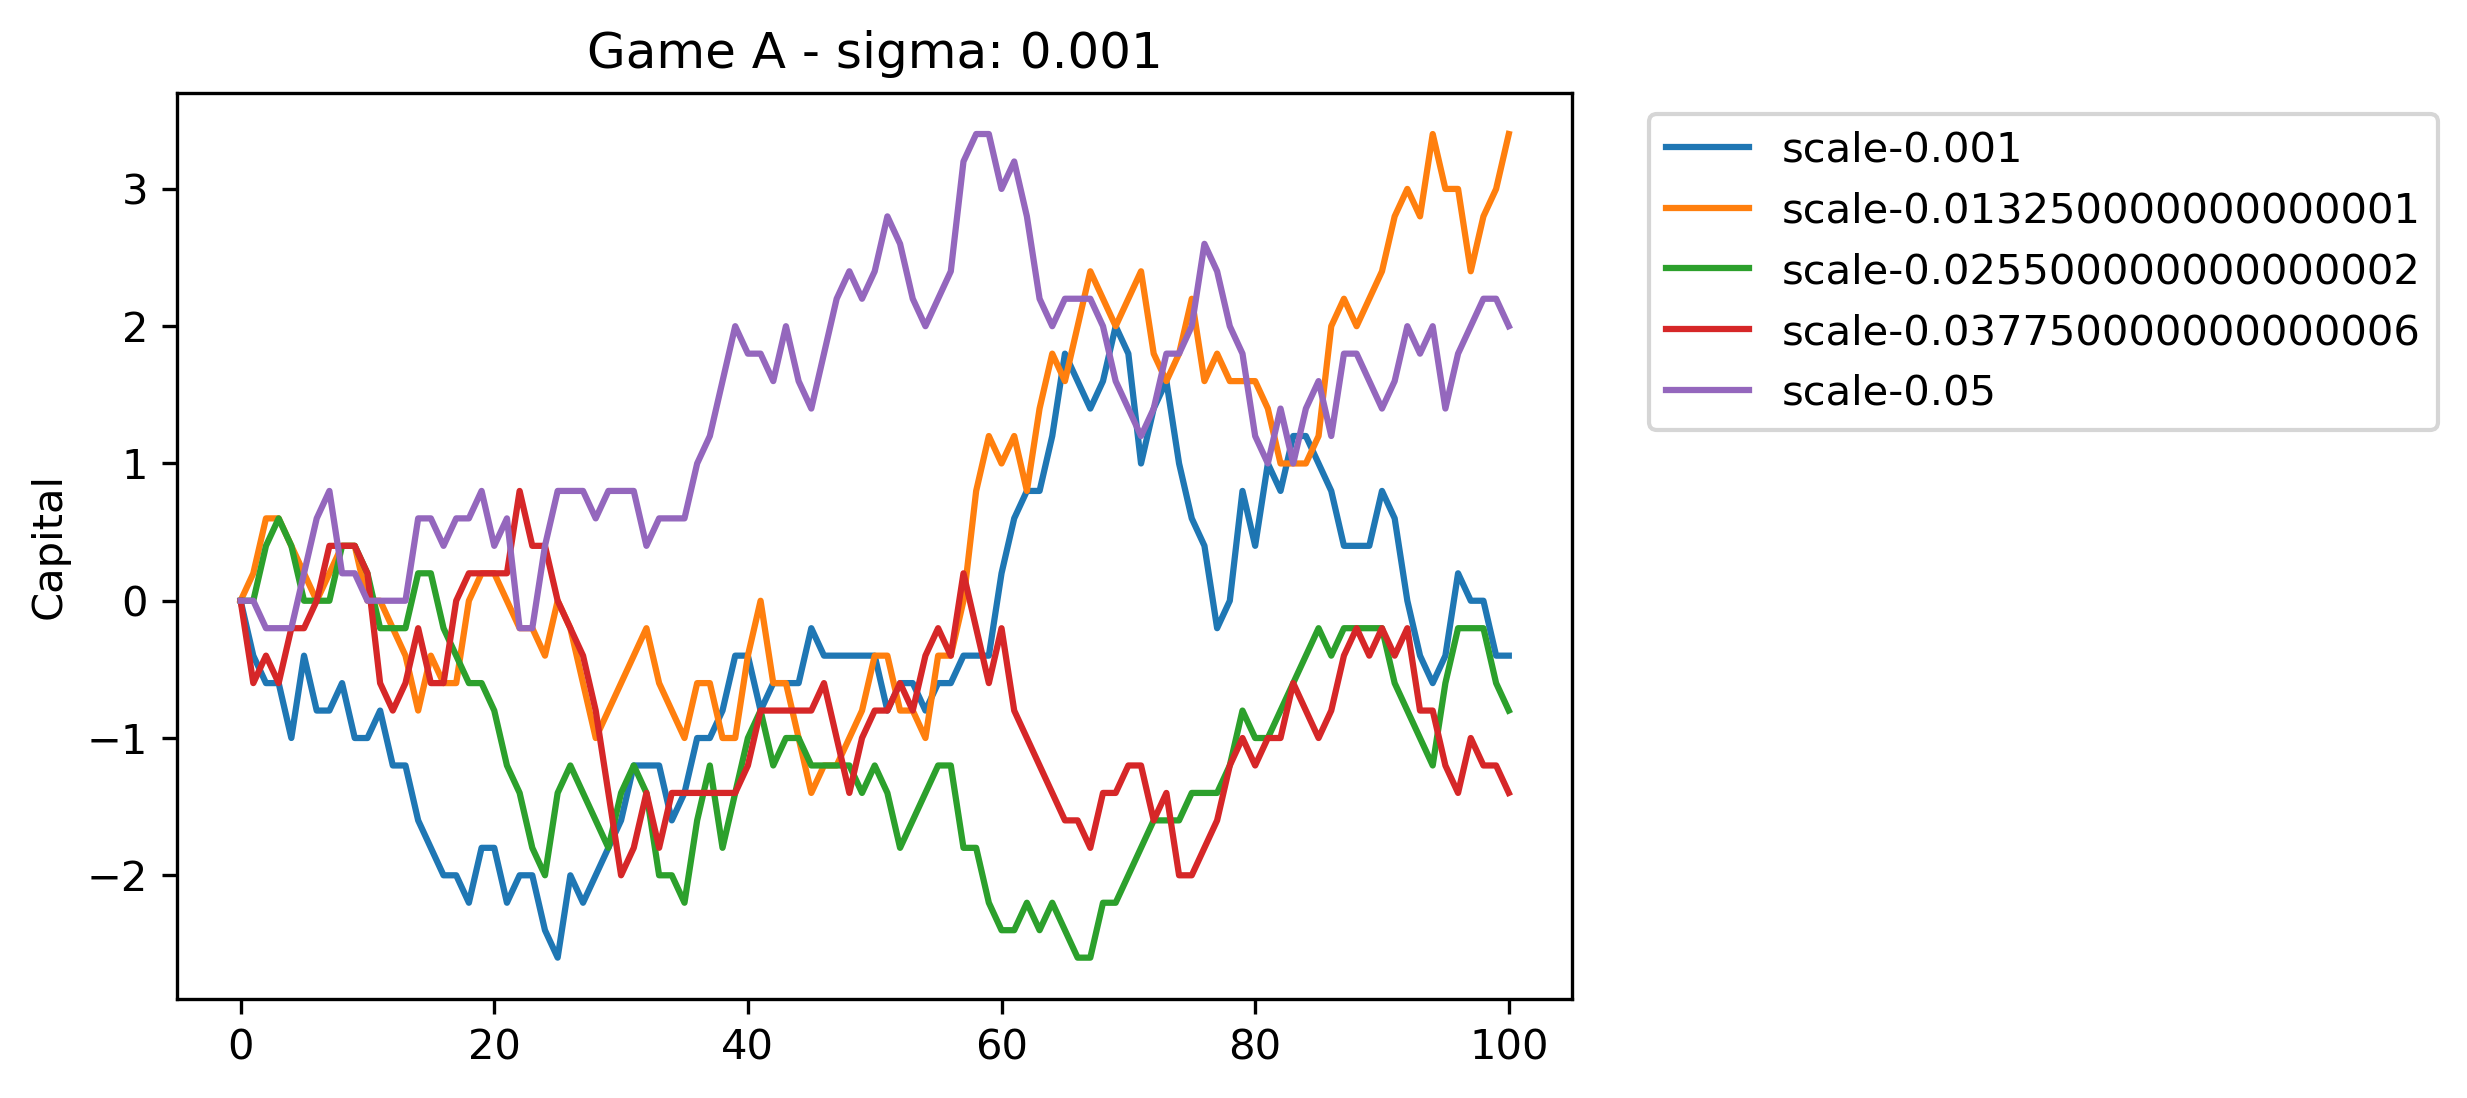

0.671469399999296
0.6625334999998813
0.732992600000216
0.6265536000000793
0.747114199999487


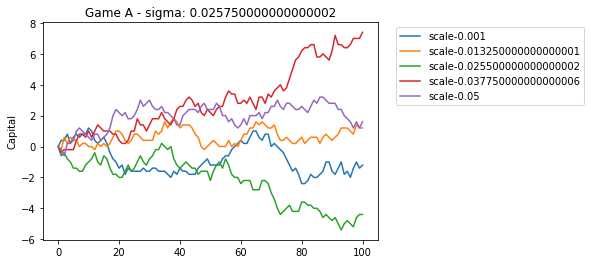

0.7311176000002888
0.6459230000000389
0.594258300000547
0.6676871999998184
0.6112135000003036


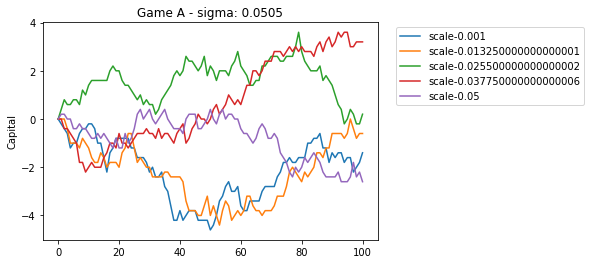

0.854130300000179
0.7014817999997831
0.737244400000236
0.5954242999996495
0.6471573000007993


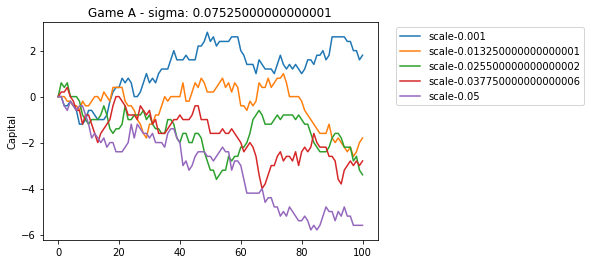

0.7787797000000865
0.8400540000002366
0.9465196000001015
0.8959657000004881
0.6006595999997444


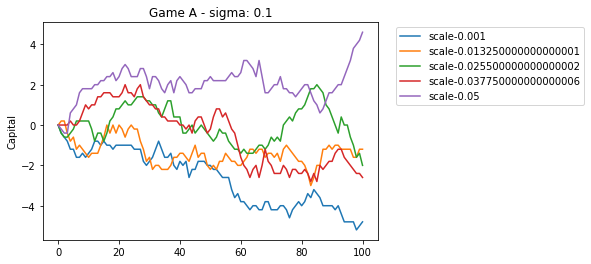

<Figure size 432x288 with 0 Axes>

In [6]:
plt.figure(dpi=300)

for sigma in sigma_list:
    for scale in scale_list:
        mp.freeze_support()
        tic = time.perf_counter()
        args = (mu, sigma, scale) 
        game_a_results = parallelize(sim_history_gaussian_noise.game_a_single, args)
        toc = time.perf_counter()
        # with open('./Game_A_npy/game_a_results_noise scale-{} sigma-{}.npy'.format(scale, sigma), 'wb') as f:
        #     np.save(f, game_a_results)
        plt.plot(x_axis, game_a_results, label = "scale-{}".format(scale))

    plt.ylabel('Capital')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.title('Game A - sigma: {}'.format(sigma))
    plt.show()
    # plt.savefig('./Game_A_plots/Game A sigma- {}.png'.format(sigma))
    plt.clf()

# Game B

104.76173
106.93030579999999
95.66303340000002
103.08743909999998
103.43607609999992
102.85036290000005
105.77620320000005
89.96915739999997
80.90686830000004
81.22486360000016


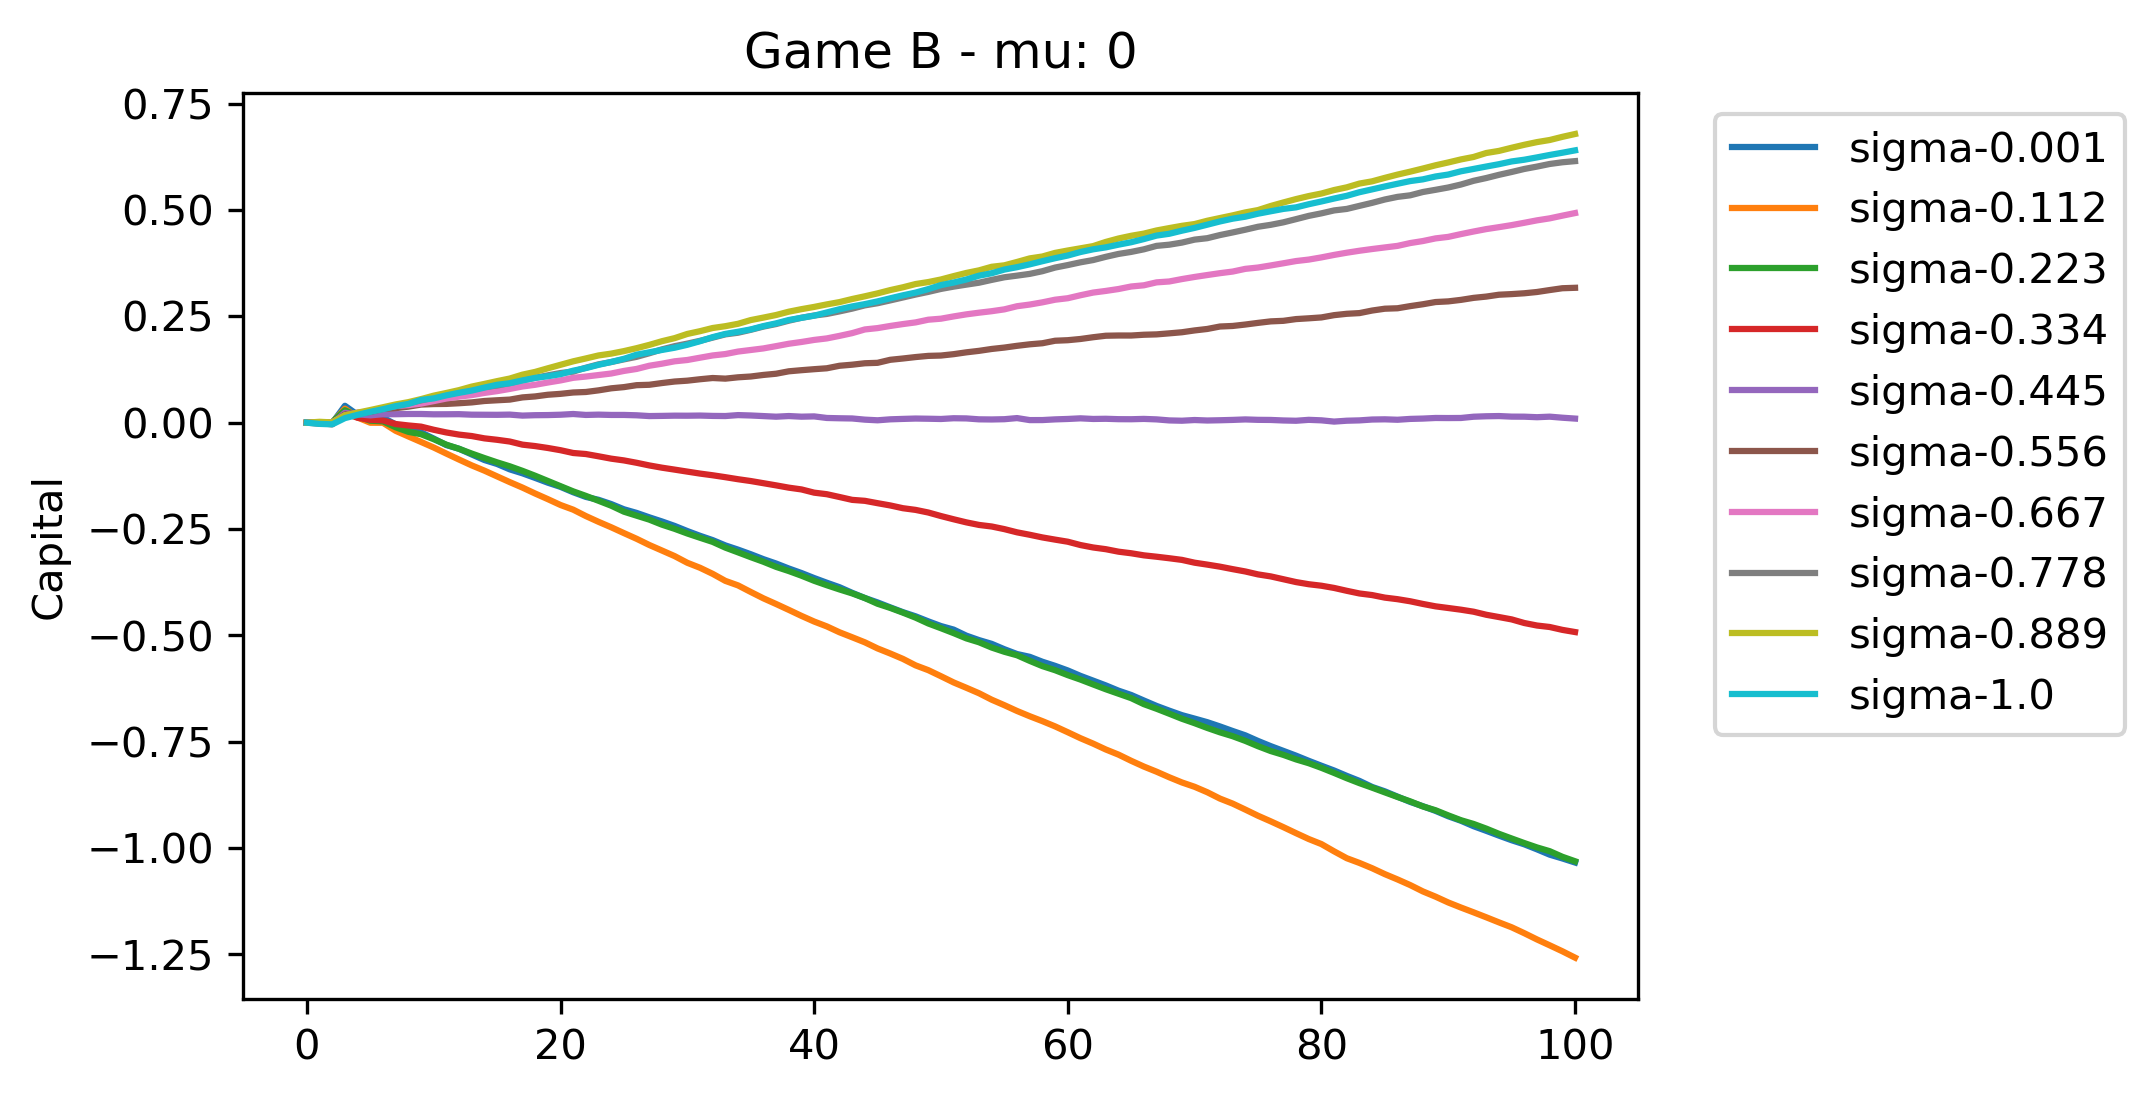

In [9]:
plt.figure(dpi=300)

for sigma in sigma_list:
    for scale in scale_list:
        mp.freeze_support()
        tic = time.perf_counter()
        args = (mu, sigma, scale) 
        game_b_results = parallelize(sim_history_gaussian_noise.game_b_single, args)
        toc = time.perf_counter()
        with open('./Game_B_npy/game_b_results_noise scale-{} sigma-{}.npy'.format(scale, sigma), 'wb') as f:
            np.save(f, game_b_results)
        plt.plot(x_axis, game_b_results, label = "scale-{}".format(scale))

    plt.ylabel('Capital')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.title('Game B - sigma: {}'.format(sigma))
    plt.savefig('./Game_B_plots/Game B sigma- {}.png'.format(sigma))
    plt.clf()

# Random

0.4619638999997733
0.3901313999999729
0.3412303999998585
0.4033134000001155
0.38994289999982357
0.355953799999952
0.3779313000000002
0.3733735999999226
0.36140800000021045
0.3954186999999365


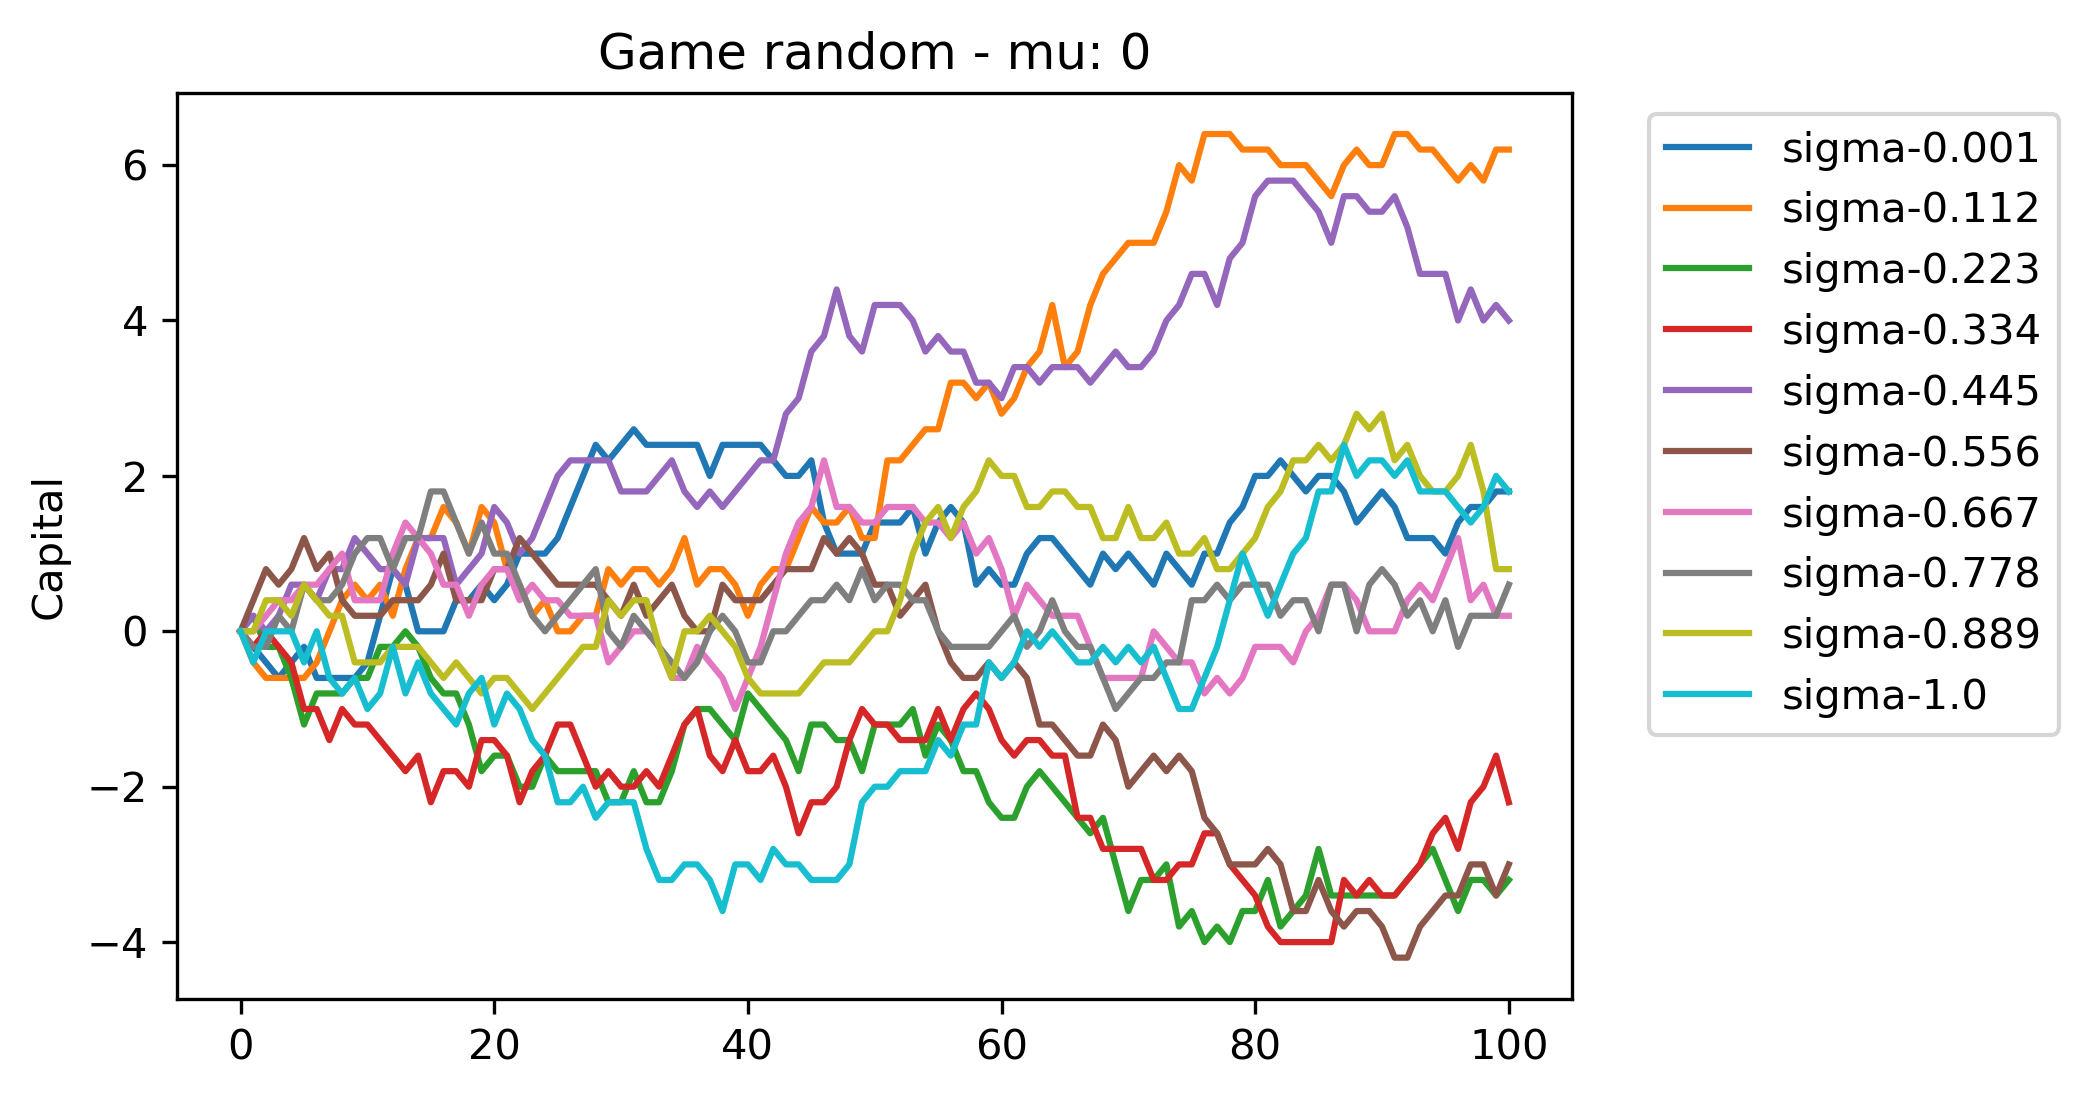

In [6]:
plt.figure(dpi=300)

for sigma in sigma_list:
    for scale in scale_list:
        mp.freeze_support()
        tic = time.perf_counter()
        args = (mu, sigma, scale) 
        game_rand_results = parallelize(sim_history_gaussian_noise.sim_rand_a_b_single, args)
        toc = time.perf_counter()
        with open('./Game_rand_npy/game_rand_results_noise scale-{} sigma-{}.npy'.format(scale, sigma), 'wb') as f:
            np.save(f, game_rand_results)
        plt.plot(x_axis, game_rand_results, label = "scale-{}".format(scale))

    plt.ylabel('Capital')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.title('Game random - sigma: {}'.format(sigma))
    plt.savefig('./Game_random_plots/Game random sigma- {}.png'.format(sigma))
    plt.clf()

# AABB

0.4906423000002178
0.39883149999968737
0.34766039999976783
0.37744119999979375
0.3702723999999762
0.3848711999999068
0.4124409999999443
0.3714615000003505
0.35757220000004963
0.42095309999967867


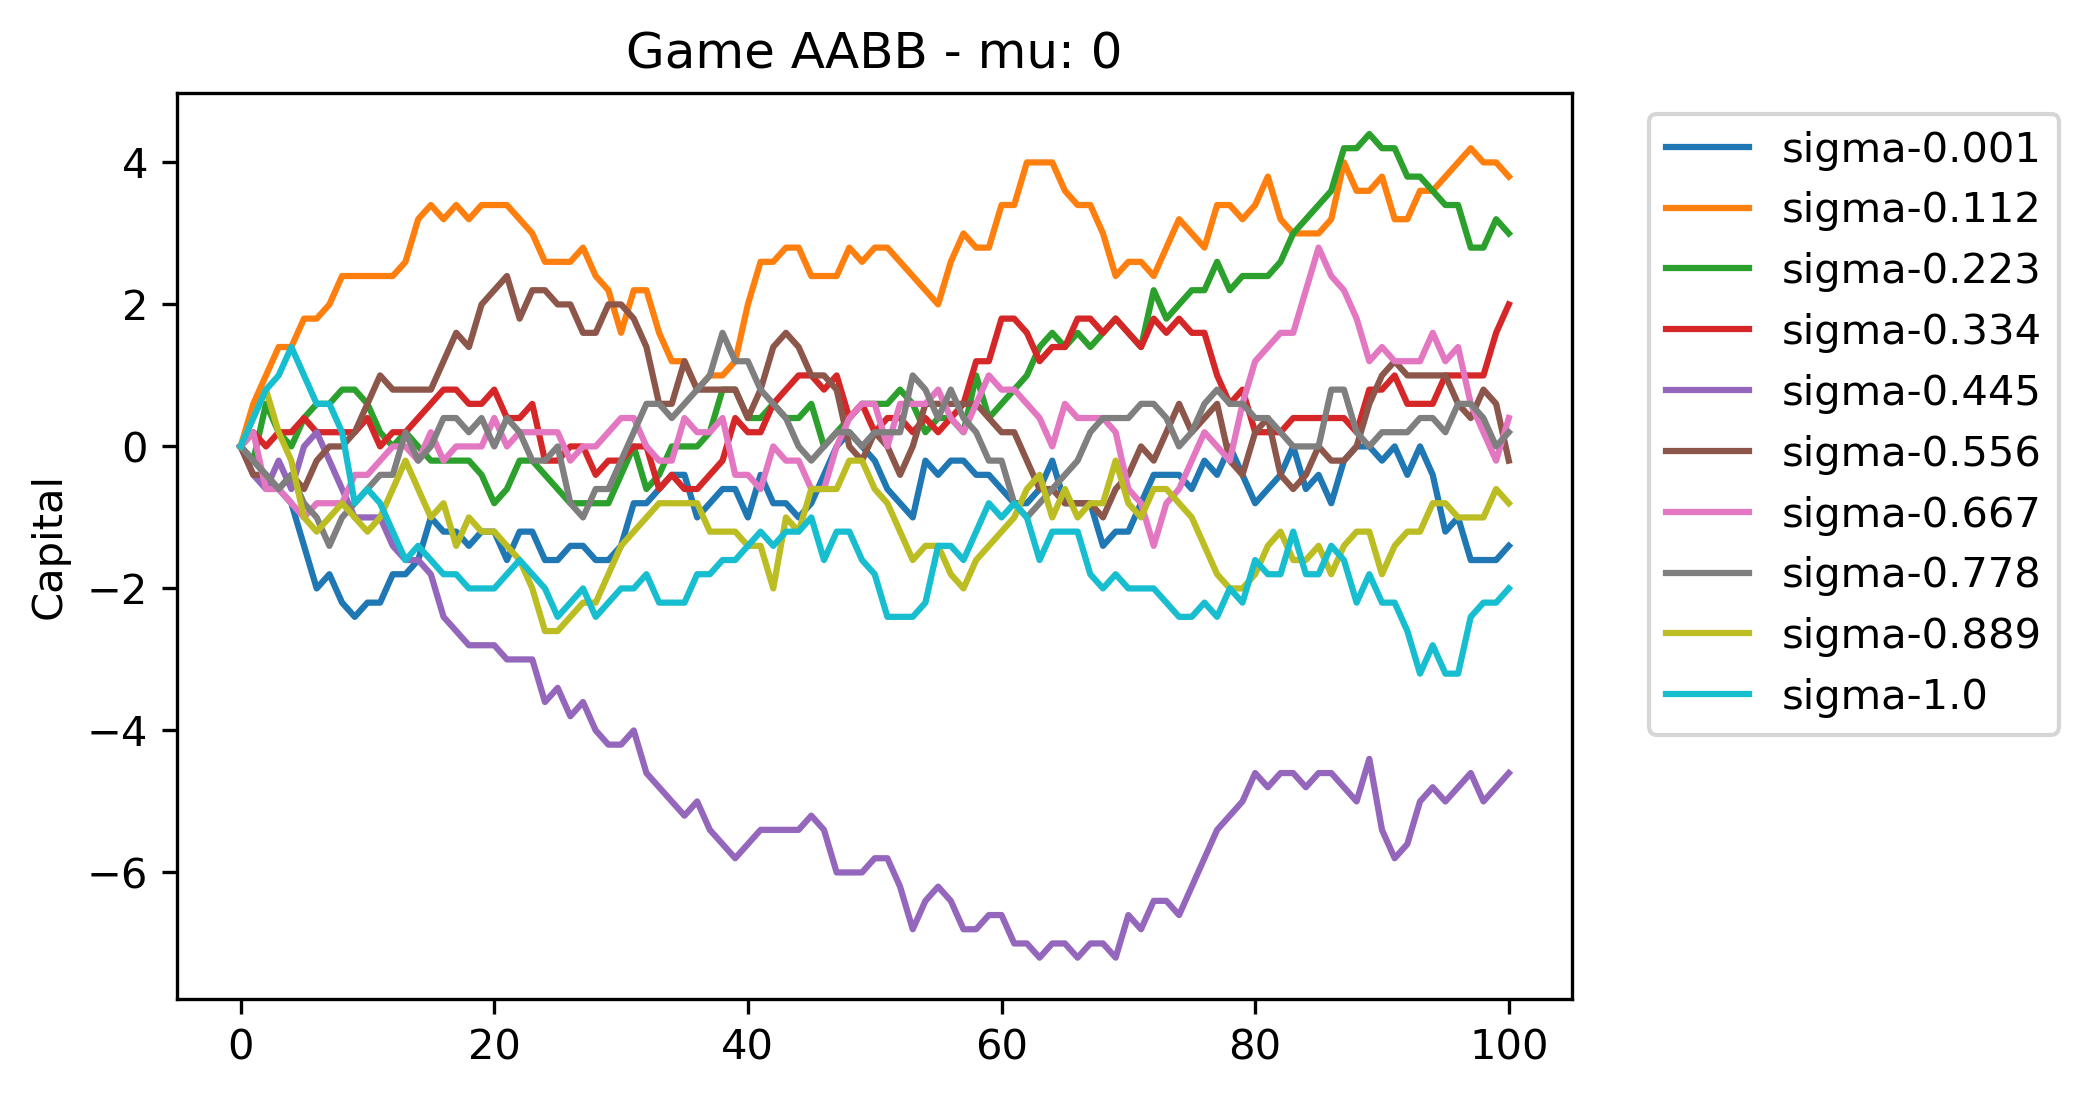

In [7]:
plt.figure(dpi=300)

for sigma in sigma_list:
    for scale in scale_list:
        mp.freeze_support()
        tic = time.perf_counter()
        args = (mu, sigma, scale) 
        game_aabb_results = parallelize(sim_history_gaussian_noise.sim_AABB_single, args)
        toc = time.perf_counter()
        with open('./Game_AABB_npy/game_aabb_results_noise scale-{} sigma-{}.npy'.format(scale, sigma), 'wb') as f:
            np.save(f, game_aabb_results)
        plt.plot(x_axis, game_aabb_results, label = "scale-{}".format(scale))

    plt.ylabel('Capital')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.title('Game_AABB_plots - sigma: {}'.format(sigma))
    plt.savefig('./Game_AABB_plots/Game AABB sigma- {}.png'.format(sigma))
    plt.clf()